<h1>CIFAR-10 DATASET</h1>

**The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.**

The CIFAR-10 dataset is a widely used benchmark dataset in machine learning and computer vision, particularly for image classification tasks. Here are the main features of the CIFAR-10 dataset:

**Image Size and Format:**
The dataset consists of 60,000 color images.
Each image is 32x32 pixels in size.
The images are in RGB format, meaning they have three color channels.

**Categories:**
The images are divided into 10 different classes.
Each class contains 6,000 images.
The classes represent distinct object categories: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

**Training and Test Split:**
The dataset is split into a training set and a test set.
The training set contains 50,000 images.
The test set contains 10,000 images.

**Uniform Distribution:**
The dataset is balanced, meaning each class has an equal number of images.

**Annotations:**
Each image is labeled with one of the 10 classes.
The labels are provided in the dataset, facilitating supervised learning.

**Preprocessing and Standardization:**
The dataset is often preprocessed to normalize the image pixel values, typically scaling them to a range of 0 to 1 or -1 to 1.
Standard data augmentation techniques (such as random cropping, flipping, and rotation) are commonly applied to increase the robustness of models trained on CIFAR-10.

**Usage:**
The CIFAR-10 dataset is primarily used for training and evaluating machine learning algorithms, particularly in the context of image classification.
It serves as a standard benchmark for comparing the performance of various models and algorithms.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

test_data = unpickle("cifar-10-batches-py/test_batch")

In [3]:
x_test = test_data[b'data']
y_test = test_data[b'labels']

In [4]:
# Convert labels to numpy array
y_test = np.array(y_test)

In [5]:
print(x_test.shape)  # Should print (10000, 3072)
print(y_test.shape)  # Should print (10000,)

(10000, 3072)
(10000,)


In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_counts = Counter(y_test)
class_counts = dict(sorted(class_counts.items()))

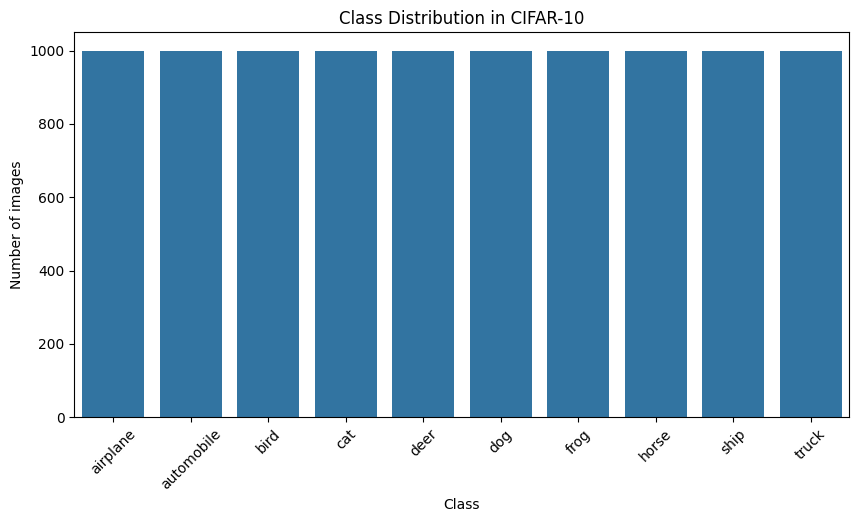

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Class Distribution in CIFAR-10')
plt.show()

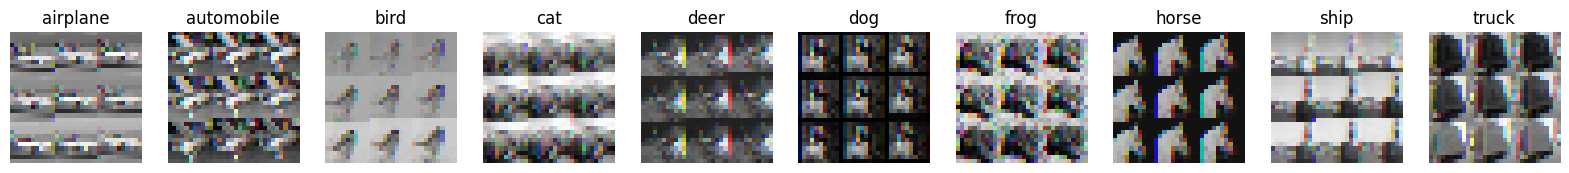

In [8]:
# Function to plot one image from each class
def plot_one_image_per_class(x_test, y_test, class_names):
    samples_per_class = 1
    plt.figure(figsize=(20, 5))
    for cls in range(len(class_names)):
        indices = np.where(y_test == cls)[0]
        selected_index = np.random.choice(indices, samples_per_class, replace=False)
        plt.subplot(1, len(class_names), cls + 1)
        img = x_test[selected_index].reshape(32, 32, 3)
        plt.imshow(img / 255.0)
        plt.title(class_names[cls])
        plt.axis('off')
    plt.show()

plot_one_image_per_class(x_test, y_test, class_names)


Mean pixel value: 121.52915475260416
Standard deviation of pixel values: 63.202270154297366


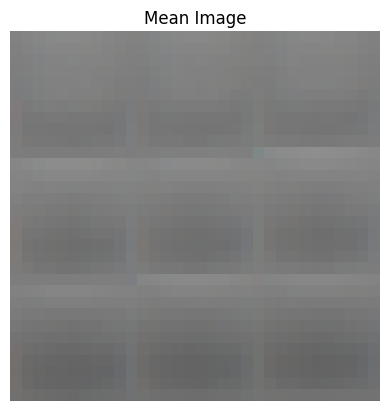

In [9]:
# Compute statistics
mean_image = np.mean(x_test, axis=0)
std_image = np.std(x_test, axis=0)

print(f"Mean pixel value: {mean_image.mean()}")
print(f"Standard deviation of pixel values: {std_image.mean()}")

# Visualize the mean image
mean_image = mean_image.reshape(32, 32, 3)
plt.imshow(mean_image / 255.0)
plt.title('Mean Image')
plt.axis('off')
plt.show()


What is the shape of my dataset? <br>
The CIFAR-10 dataset has 10,000 test images.

Each image is of shape  <br>
32×32×3

What are the data types of each feature? <br>
The data type for pixel values is uint8 (unsigned 8-bit integer).

Are there any missing values? <br>
There are no missing values in the CIFAR-10 dataset.

How are the classes distributed in my dataset? Is there a class imbalance?<br>
The classes are evenly distributed in the CIFAR-10 dataset, with 1,000 images per class.
A bar plot showing 1,000 images per class, indicating no class imbalance.

What is the distribution of pixel values in the dataset?<br>
The pixel values range from 0 to 255, with a mean value of approximately 121.53.